In [0]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np

(0.0, 20.0)

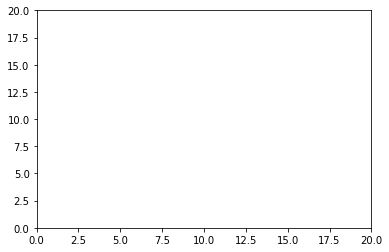

In [0]:
#inisialisasi range lapangan
x_range = 20
y_range = 20

#buat lapangan
plt.xlim(0, x_range)
plt.ylim(0, y_range)

In [0]:
# inisialisasi variabel skalar
individu = 200
rasio_terinfeksi = 0.05
probabilitas_gerak = 0.8
waktu_pemulihan = 10
titik = 0
j = 0
k = 0


In [0]:
#inisialisasi variabel list
posisi_individuX = []
posisi_individuY = []
imunitas_individu = []
waktu_terinfeksi = []
dayList = []
r_Infected = []
status_kesehatan_individu = []
status_kesehatan_individu.append([])
status_kesehatan_individu_day1 = status_kesehatan_individu[0]

In [0]:
#inisialisasi atribut atribut individu
def inisialisasi():
  for i in range(individu):
    posisi_individuX.append([])
    posisi_individuY.append([])
    prob = float("{:.2f}".format(random.uniform(0, 1)))
    if prob <= 0.05:
      status_kesehatan_individu_day1.append("Terinfeksi")
    else:
      status_kesehatan_individu_day1.append("Sehat")
    imunitas_individu.append(False)
    if status_kesehatan_individu_day1[i] == "Terinfeksi":
      waktu_terinfeksi.append(10)
    else:
       waktu_terinfeksi.append(0)

In [0]:
#fungsi utama
def iterate():
  infected = 0
  day = 0
  x = 0
  y = 0
  x_old = 0
  y_old = 0
  #hitung individu yang terinfeksi di day 0
  for i in range(individu):
    if status_kesehatan_individu[0][i] == "Terinfeksi":
      infected += 1
  while(infected > 0): #Mengulang sampai tidak ada yang terinfeksi
    ind_infected = 0
    status_kesehatan_individu_dayN = []
    for i in range(individu):
      status_kesehatan_individu_dayN.append(status_kesehatan_individu[day][i])
    #Update Posisi
    for i in range(individu):
      x = 0
      y = 0
      ind_pos_x = posisi_individuX[i]
      ind_pos_y = posisi_individuY[i]
      if sum(ind_pos_x) == 0:
        ind_pos_x.append(random.randint(0, x_range))
        ind_pos_y.append(random.randint(0, y_range))
      else:
        rand = random.uniform(0, 1)
        if rand <= 0.25:
          x = 1 #kanan
        elif rand <= 0.50:
          y = -1 #bawah
        elif rand <= 0.75:
          x = -1 #kiri
        else:
          y = 1 #atas
        walk_prob = random.uniform(0, 1)
        if walk_prob <= 0.80: #Kemungkinan pindah tempat 80%
          newX = x + ind_pos_x[j-1]
          newY = y + ind_pos_y[j-1]
          #Periodic Boundary Condition
          if newX > x_range:
            newX = newX - x_range
          elif newX < 0:
            newX = newX + x_range
          if newY > y_range:
            newY = newY - y_range
          elif newY < 0:
            newY = newY + y_range   
          ind_pos_x.append(newX)
          ind_pos_y.append(newY)
        else:
          ind_pos_x.append(ind_pos_x[j-1])
          ind_pos_y.append(ind_pos_y[j-1])
    #Cek kesehatan
    for i in range(individu - 1): #Mengulang sampai index kedua dari terakhir
      k = i+1
      while k <= (individu - 1): #Array start from 0, kalo sampai individu bakal "Index out of range"
        titik = math.sqrt((posisi_individuX[k][-1]-posisi_individuX[i][-1])**2 + (posisi_individuY[k][-1]-posisi_individuY[i][-1])**2) #Euclidean Distance
        if titik == 0: #Di lokasi yang sama
          if status_kesehatan_individu[day][i] == "Terinfeksi" and imunitas_individu[k] == False:
            if status_kesehatan_individu[day][k] == "Sehat":
              status_kesehatan_individu_dayN[k] = "Terinfeksi" 
              waktu_terinfeksi[k] = 10
          if status_kesehatan_individu[day][k] == "Terinfeksi" and imunitas_individu[i] == False:
            if status_kesehatan_individu[day][i] == "Sehat": 
              status_kesehatan_individu_dayN[i] = "Terinfeksi"
              waktu_terinfeksi[i] = 10  
        k += 1
    #Update waktu terinfeksi
    for i in range(individu): 
      if status_kesehatan_individu_dayN[i] == "Terinfeksi":
        waktu_terinfeksi[i] -= 1
        ind_infected += 1
        if waktu_terinfeksi[i] == 0:
          status_kesehatan_individu_dayN[i] = "Sehat"
          imunitas_individu[i] = True
          ind_infected -= 1 
    status_kesehatan_individu.append(status_kesehatan_individu_dayN)
    infected = ind_infected
    r_Infected.append(ind_infected)
    day += 1
    dayList.append(day)
  




In [0]:
#WARNING: jika ingin mengeksekusi main lagi, eksekusi cell kode inisialisasi variabel list dan skalar terlebih dahulu agar variabel terinisialisasi ulang
if __name__ == '__main__':
  inisialisasi()
  iterate() 

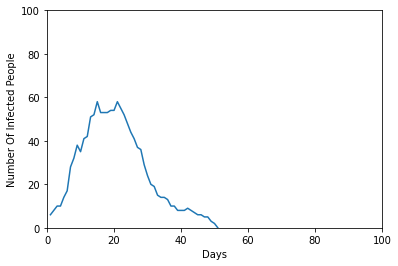

In [0]:
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure() 
ax = plt.axes(xlim=(0, 100), ylim=(0, 100)) 
plt.xlabel("Days")
plt.ylabel("Number Of Infected People")
line1, = ax.plot([], [])

def init(): #Inisialisasi plot
	# creating an empty plot/frame 
	line1.set_data([], []) 
	return line1,

xdata = []
ydata = []

x = 0
y = 0

def update(i): #Fungsi Animasi 
  x = dayList[i]
  y = r_Infected[i]

  xdata.append(x)
  ydata.append(y)

  line1.set_data(xdata, ydata)
  return line1,

anim = animation.FuncAnimation(fig, update, init_func=init,
							frames=len(dayList), interval=500, blit=True) #Fungsi animasi

rc('animation', html='jshtml') #agar animasinya bisa dijalankan di colab
anim #Output animasi



In [0]:
fig = plt.figure()
fig.suptitle('Sehat (Blue) vs Sakit (Yellow)', fontsize=16)
ax = plt.axes(xlim=(-1, 21), ylim=(-1, 21))
def redSpot(i): #Fungsi tidak jadi dipakai karena hilang saat scatterplot dianimasikan
  if status_kesehatan_individu[0][i] == "Terinfeksi":
    return 'r'
  else:
    return 'b'
scatters =  [ ax.scatter(posisi_individuX[i][0], posisi_individuY[i][0], c=redSpot(i)) for i in range(individu)] #Inisialisasi awal scatterplot
iterations = len(dayList)  #Untuk jumlah frame, frame = panjang list dayList

blues = np.array([4.46503452e-01, 6.91578814e-01, 9.70233137e-01, 3.13515142e-01,
  9.42380687e-01, 1.71644604e-01, 7.85720855e-01, 3.44240293e-01,
  2.44400008e-01, 6.72849471e-01]) #Warna orang sehat (Biru)
yellow = np.array([9.05290106e-01, 9.48278289e-01, 4.47613308e-01, 2.73645641e-01,
  1.28366397e-01, 3.79155471e-01, 6.87947425e-01, 5.42286742e-01,
  8.27397922e-01, 3.35916704e-01]) #Warna orang sakit (Kuning)

def animate_scatters(iteration): #Fungsi Animasi 
    for i in range(individu):
        scatters[i].set_offsets([posisi_individuX[i][iteration], posisi_individuY[i][iteration]]) #Set posisi scatterplot
        if status_kesehatan_individu[iteration+1][i] == "Terinfeksi":
           scatters[i].set_array(yellow) #Set color
        else:
           scatters[i].set_array(blues) #Set color
        
    return scatters


ani = animation.FuncAnimation(fig, animate_scatters, iterations,interval=500, blit=False) #Fungsi animasi
rc('animation', html='jshtml') #agar animasinya bisa dijalankan di colab
ani #Output animasi




